<a href="https://colab.research.google.com/github/ssobranding/Portfolio/blob/main/2_Portfolio_App_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data open & load
***

In [ ]:
pip install konlpy

In [ ]:
import json
import ast
import sys
import re
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Kkma
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import csv, sys
import numpy as np

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
import pandas as pd
import requests
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Korean Font
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/NanumBarunGothic.ttf'

# 폰트 이름 설정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글을 사용하는 경우 마이너스 기호가 제대로 표시되도록 설정
plt.rcParams['axes.unicode_minus'] = False


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
all_game_old = pd.read_csv("/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/게임데이터_리뷰3.csv")

In [ ]:
all_game_new = pd.read_csv("/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/game_all_20230404.csv")

# Data Inquiry and Preprocessing
***

## Data Processing

In [ ]:
# Old Data Verification
print(all_game_old.info(),"\n")
print(all_game_old.GAME.describe(),"\n")
print(all_game_old.GAME.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9276 entries, 0 to 9275
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   USER    9276 non-null   object
 1   DATE    9276 non-null   object
 2   STAR    9276 non-null   int64 
 3   LIKE    9276 non-null   int64 
 4   TITLE   9276 non-null   object
 5   REVIEW  9276 non-null   object
 6   GAME    9276 non-null   object
dtypes: int64(2), object(5)
memory usage: 507.4+ KB
None 

count     9276
unique      19
top       검은사막
freq       500
Name: GAME, dtype: object 

검은사막        500
던전앤파이터      500
달빛조각사       500
배틀그라운드      500
블루아카이브      500
피파온라인4m     500
탕탕특공대       500
쿠키런킹덤       500
원신          500
우마무스메       500
오딘          500
세븐나이츠       500
메이플스토리m     500
마구마구        500
리니지w        500
리니지2레볼루션    500
가디언테일즈      500
히어로즈테일즈     408
히트2         368
Name: GAME, dtype: int64


In [ ]:
# New Data Verification
print(all_game_new.info(),"\n")
print(all_game_new.GAME.describe(),"\n")
print(all_game_new.GAME.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7834 entries, 0 to 7833
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   USER    7834 non-null   object
 1   DATE    7834 non-null   object
 2   STAR    7834 non-null   int64 
 3   LIKE    7834 non-null   int64 
 4   TITLE   7834 non-null   object
 5   REVIEW  7834 non-null   object
 6   GAME    7834 non-null   object
dtypes: int64(2), object(5)
memory usage: 428.5+ KB
None 

count       7834
unique        16
top       가디언테일즈
freq         500
Name: GAME, dtype: object 

가디언테일즈      500
달빛조각사       500
블루아카이브      500
배틀그라운드      500
탕탕특공대       500
바람의나라연      500
검은사막        500
오딘발할라라이징    500
아키에이지워      500
미르          500
쿠키런킹덤       500
리니지m        500
리니지w        500
원신          500
우마무스메       500
프라시아전기      334
Name: GAME, dtype: int64


In [ ]:
all_game_old.sort_values(by='DATE', ascending=False).head(5)

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME
500,isijejw,2022-11-24 01:23:46-07:00,1,0,업데이트,시간 데이터 쓰면서 업데이트 했는데 계속 튕기네요;,던전앤파이터
5000,digsna,2022-11-24 01:09:48-07:00,2,0,제발 업데이트 좀 그만시키세요,제발 업데이트 좀 그만하세요\n무슨 하루 한 번은 꼭 게임들어갈때마다 200메가씩 ...,쿠키런킹덤
7776,왕왕뿌뿌,2022-11-24 01:04:19-07:00,1,0,소리가 아예 안 나요ㅜㅠ,앱을 다운받은 뒤로 소리가 난 적이 없어요.. 다른 앱이나 유튜브에서는 소리가 잘 ...,배틀그라운드
501,스윙느그매,2022-11-24 00:20:17-07:00,1,0,네트워크 불안정,ㅆㄹㄱ겜답게 네트워크 불안정 뜨면서 안된 3번 깔아봄 다른사람도 증상같은사람 ㅈㄴ...,던전앤파이터
2000,디도가,2022-11-23 23:36:08-07:00,5,0,광고시청 오류,냥코대작전 광고나오면 다 보고나서 보석 수령이 안되는 오류가 있습니다. 화면이 넘어...,마구마구


In [ ]:
all_game_old.sort_values(by='DATE', ascending=False).tail(5)

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME
1495,김찡긋,2019-11-03 18:56:03-07:00,5,0,아이패드 에어3 소리가 안나요....,애플에 전화햇는데 호환성 문제라고 전달받앗어요 소리가 안나는데 어떡하죠..... 답...,리니지2레볼루션
1496,Ssibalnomdla,2019-11-03 07:19:20-07:00,1,0,아 팅겨서,못해먹겟다 pc로 해도 팅기고 아이폰도 팅기고 짜증나서 못해먹겟다,리니지2레볼루션
1497,장 좀 합시다,2019-11-03 05:52:59-07:00,2,0,인간적으로 최적화 좀 합시다,팅긴후...검은화면에서 BGM만 나오다 끊기는 현상이 한두번도 아니고\n그럴때마다 ...,리니지2레볼루션
1498,꿍띵꽁양,2019-11-01 09:20:29-07:00,2,0,구매삭제요청함니다,구ㅐ삭제해주세요,리니지2레볼루션
1499,롱드래곤,2019-11-01 06:32:34-07:00,1,0,별 하나도 아깝다,버그 수정이나 유저들의 의견에 귀 기울이기는 커녕 \n과금패치만 주구장창 해 댄다....,리니지2레볼루션


In [ ]:
all_game_new.sort_values(by='DATE', ascending=False).head(5)

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME
3000,잘하자아,2023-04-02 19:42:33-07:00,5,0,너무 지루함,잠깐잠깐 시간날때 해보려고 하는데.. 이동하는거만 보다 끝남… 퀘스트에 강제성이 너...,프라시아전기
2000,어어오 ㅇ ㅓ,2023-04-02 16:14:30-07:00,4,0,ㅇ,이거 할때마다 게임이 자꾸 나가져요\n그리고 상자에서도 깔때 꺼져요,탕탕특공대
3001,던힐원츄,2023-04-02 15:59:26-07:00,1,0,로그인 안돼네요,아침에 업데이트 후 로그인이 아예 안됨 \n왜 업데이트한건가요??,프라시아전기
3002,방라자1099,2023-04-02 15:57:50-07:00,4,0,다좋은디.. 업뎃할때마다 로그인이 안되네여.,로그인 이슈좀 어떻게 해봐요,프라시아전기
4334,천공여신12,2023-04-02 15:06:15-07:00,1,0,많이아쉬움,화면 돌아가는것도 pvp도 많이아쉬운듯 창고도 돈처발라라고\n안늘어나고 보통 시간지...,아키에이지워


In [ ]:
all_game_new.sort_values(by='DATE', ascending=False).tail(5)

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME
995,iyesol06,2020-04-08 06:15:06-07:00,5,0,로열패스 퀘스트 오류,게임 정말 재밌고 열심히 하고 있는데 조각사 로열패스 퀘스트를 진행하고 있었어요. ...,달빛조각사
996,블스태이,2020-04-08 05:04:09-07:00,5,0,재밌게 하고 있는데 문제 발생 시 빠르게 처리해주세요^^,너무 재밌게 하고 있어요 \n근데 채집이 안되서 퀘스트를 계속 못하고 있네요 ㅠㅠ ...,달빛조각사
997,근무시간중,2020-04-08 03:26:10-07:00,2,0,버그있습니다,오랜만에 재접했는데 하우스에있는 아이탬 전부 배치해체되어있고 창고에있던아이템 다사라...,달빛조각사
998,단지주인,2020-04-08 02:37:45-07:00,5,0,와...,진짜 리뷰같은거 보고 여태 안하다가 지금에서야 하는데 너무 재밌고 그래픽 브금 등 ...,달빛조각사
999,주노주농야턑,2020-04-08 01:51:17-07:00,5,0,굳이에영,넘 재밌어영 자사도 재밌구 편해영,달빛조각사


In [ ]:
## 데이터 합친 후 중복 데이터 제거

# 두 데이터프레임 합치기
combined_game = pd.concat([all_game_old, all_game_new])

# 중복된 데이터 제거
comparable_game = combined_game.drop_duplicates()

# Replace '오딘' to '오딘발할라라이징' [오딘 = 오딘발할라라이징]
comparable_game['GAME'] = comparable_game['GAME'].replace('오딘', '오딘발할라라이징')

# 결과 확인
comparable_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14631 entries, 0 to 7820
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   USER    14631 non-null  object
 1   DATE    14631 non-null  object
 2   STAR    14631 non-null  int64 
 3   LIKE    14631 non-null  int64 
 4   TITLE   14631 non-null  object
 5   REVIEW  14631 non-null  object
 6   GAME    14631 non-null  object
dtypes: int64(2), object(5)
memory usage: 914.4+ KB


<ipython-input-16-d71fe8d9e500>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_game['GAME'] = comparable_game['GAME'].replace('오딘', '오딘발할라라이징')


In [ ]:
## Creating Derived Variables

# DATE 컬럼을 날짜 형태로 바꾸기
comparable_game['DATE'] = pd.to_datetime(comparable_game['DATE'])

# 제목/리뷰/닉네임 길이
comparable_game["title_len"]=comparable_game.TITLE.apply(lambda x:len(x))
comparable_game["review_len"]=comparable_game.REVIEW.apply(lambda x:len(x))
comparable_game["nickname_len"]=comparable_game.USER.apply(lambda x:len(x))

# DATE 관련 파생변수 생성 (월/일/시/분/요일)
comparable_game["month"]=comparable_game["DATE"].dt.month
comparable_game["day"]=comparable_game["DATE"].dt.day
comparable_game["hour"]=comparable_game["DATE"].dt.hour
comparable_game["minute"]=comparable_game["DATE"].dt.minute
comparable_game["day_name"]=comparable_game["DATE"].dt.day_name()

# 한글 인코딩
comparable_game["nickname_alpha"]=comparable_game.USER.apply(lambda x: "alpha" if x.encode().isalpha() else "not")

# 제목+리뷰 길이
comparable_game["total_len"]=comparable_game["title_len"]+comparable_game["review_len"]

<ipython-input-17-b8b50130475d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_game['DATE'] = pd.to_datetime(comparable_game['DATE'])
<ipython-input-17-b8b50130475d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparable_game["title_len"]=comparable_game.TITLE.apply(lambda x:len(x))
<ipython-input-17-b8b50130475d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [ ]:
## Divide Data Filtering

# Past Review
filtered_old_review = comparable_game[comparable_game['DATE'].between('2021-04-05', '2022-04-04')]

# Recent Review
filtered_new_review = comparable_game[comparable_game['DATE'].between('2022-04-05', '2023-04-04')]

In [ ]:
## GAME 교집합 필터링

# GAME 고유값 추출
unique_games_old = set(filtered_old_review['GAME'].unique())
unique_games_new = set(filtered_new_review['GAME'].unique())

# 두 고유값 집합의 교집합 찾기
common_games = unique_games_new.intersection(unique_games_old)

# 각 데이터프레임에서 중복된 'GAME' 항목만 필터링
old_review = filtered_old_review[filtered_old_review['GAME'].isin(common_games)]
new_review = filtered_new_review[filtered_new_review['GAME'].isin(common_games)]
total_review = pd.concat([old_review, new_review])

## Verification

In [ ]:
# Verification
print("[Filtered Old]\n", old_review.GAME.value_counts(), "\n")
print(old_review.info(), "\n")
print("[Filtered New]\n", new_review.GAME.value_counts(), "\n")
print(new_review.info(), "\n")

[Filtered Old]
 리니지w        382
가디언테일즈      362
블루아카이브      350
히어로즈테일즈     347
오딘발할라라이징    334
검은사막        318
메이플스토리m     308
마구마구        243
리니지m        205
미르           83
달빛조각사        77
리니지2레볼루션     48
바람의나라연        5
Name: GAME, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3062 entries, 182 to 6813
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype                                 
---  ------          --------------  -----                                 
 0   USER            3062 non-null   object                                
 1   DATE            3062 non-null   datetime64[ns, pytz.FixedOffset(-420)]
 2   STAR            3062 non-null   int64                                 
 3   LIKE            3062 non-null   int64                                 
 4   TITLE           3062 non-null   object                                
 5   REVIEW          3062 non-null   object                                
 6   GAME            3062 non-nu

In [ ]:
old_review.sort_values(by='DATE', ascending=True).head(5)

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME,title_len,review_len,nickname_len,month,day,hour,minute,day_name,nickname_alpha,total_len
6114,므쓰시,2021-04-05 05:54:19-07:00,1,0,ㅋ,개돼지해방전쟁,리니지m,1,7,3,4,5,5,54,Monday,not,8
6113,룸니아,2021-04-06 05:44:44-07:00,1,0,고객과 유저를 무시하는 회사,결국 어떻게 되는지 보여주마,리니지m,15,15,3,4,6,5,44,Tuesday,not,30
4938,와이라우,2021-04-06 12:49:12-07:00,5,0,무슨업데이트요..?,????,미르,10,4,4,4,6,12,49,Tuesday,not,14
6112,불타는참새1,2021-04-06 15:21:38-07:00,1,0,리니지M이 아니라 빠찡코M입니다,사행성에. 끝판왕.\n이게임은 하는게 아니라 보는거입니다,리니지m,17,30,6,4,6,15,21,Tuesday,not,47
6111,키다리아저씨!,2021-04-06 15:41:09-07:00,1,0,ㅆㄹㄱ 게임,ㅆㄹㄱ 게임 뭔 게임 한번 할라해도 고객센터도 응대 개같고 본인인증 시스템도 거지같...,리니지m,6,69,7,4,6,15,41,Tuesday,not,75


In [ ]:
old_review.GAME.value_counts()

리니지w        382
가디언테일즈      362
블루아카이브      350
히어로즈테일즈     347
오딘발할라라이징    334
검은사막        318
메이플스토리m     308
마구마구        243
리니지m        205
미르           83
달빛조각사        77
리니지2레볼루션     48
바람의나라연        5
Name: GAME, dtype: int64

In [ ]:
new_review.sort_values(by='DATE', ascending=True).head(5)

,USER,DATE,STAR,LIKE,TITLE,REVIEW,GAME,title_len,review_len,nickname_len,month,day,hour,minute,day_name,nickname_alpha,total_len
2991,옅 ㅌㅋ,2022-04-05 00:28:44-07:00,2,0,아이폰 재설치,하루에 몇번를 지웠다 재설치했다 하는지 모르겠네요!!!!!,바람의나라연,7,32,4,4,5,0,28,Tuesday,not,39
2255,이누가아,2022-04-05 01:26:22-07:00,3,0,캐릭터,간만에 접속 했는데 캐릭터가 뚱뚱해지고 이상해졌는게 이유가 뭘까여,마구마구,3,36,4,4,5,1,26,Tuesday,not,39
2990,Night_Elf_,2022-04-05 02:42:44-07:00,1,0,나만 그런게 아니었구나ㅋㅋㅋㅋ,미친 난 내 폰이 이상한줄 알고 몇번을 지웠다 다시깔고 몇번을 껐다 켰는데ㅋㅋㅋㅋ ...,바람의나라연,16,58,10,4,5,2,42,Tuesday,not,74
181,도릐,2022-04-05 03:44:06-07:00,4,0,굳,재밌음,검은사막,1,3,2,4,5,3,44,Tuesday,not,4
7427,Mskkyo,2022-04-05 07:05:28-07:00,2,0,연결시간 초과(8002)라고 뜹니다,무한로딩인데 어케합니까?,블루아카이브,19,13,6,4,5,7,5,Tuesday,alpha,32


In [ ]:
# Star, Like, Total Lenth Data Summary
print(old_review[["STAR","LIKE","total_len"]].describe(),"\n")
print(new_review[["STAR","LIKE","total_len"]].describe(),"\n")
print(total_review[["STAR","LIKE","total_len"]].describe())

              STAR         LIKE    total_len
count  3062.000000  3062.000000  3062.000000
mean      2.821685     0.062051    73.521228
std       1.855851     0.520162    90.268079
min       1.000000     0.000000     2.000000
25%       1.000000     0.000000    23.000000
50%       2.000000     0.000000    51.000000
75%       5.000000     0.000000    93.000000
max       5.000000    15.000000  2194.000000 

              STAR         LIKE    total_len
count  2886.000000  2886.000000  2886.000000
mean      3.107762     0.016286    72.690229
std       1.844894     0.149215    92.194465
min       1.000000     0.000000     2.000000
25%       1.000000     0.000000    20.000000
50%       4.000000     0.000000    45.000000
75%       5.000000     0.000000    90.000000
max       5.000000     4.000000  1144.000000 

              STAR         LIKE    total_len
count  5948.000000  5948.000000  5948.000000
mean      2.960491     0.039845    73.118023
std       1.855904     0.388059    91.201121
min   

# Correlation
***

<ipython-input-25-c4f8683d1870>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  review_corr=total_review.corr()


Text(0.5, 1.0, 'corr matrix')

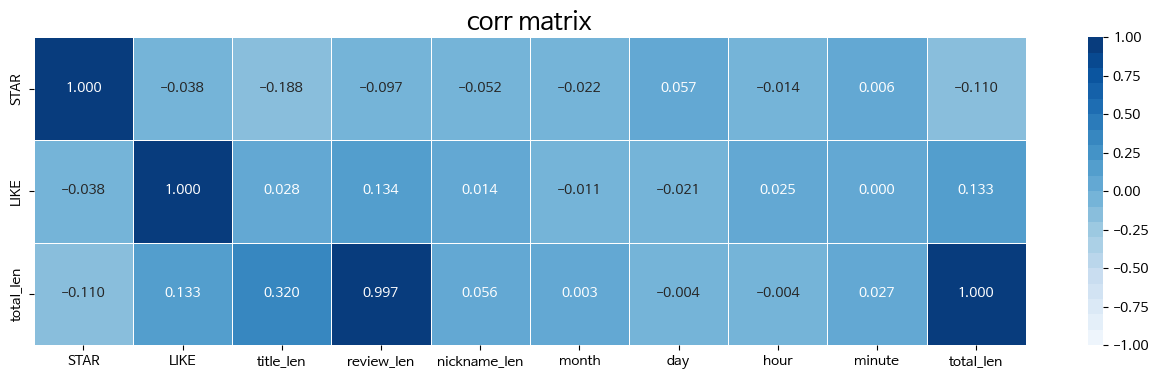

In [ ]:
# Correlation
review_corr=total_review.corr()
review_corr=review_corr[["STAR","LIKE","total_len"]]
review_corr=review_corr.transpose()

# Visualisation
f,ax = plt.subplots(figsize=(16, 4))
sns.heatmap(review_corr, vmin=-1, vmax=1, annot=True, linewidths=.5, fmt= '.3f',ax=ax, cmap=sns.color_palette("Blues", 20))
ax.set_title('corr matrix', size=18, color="black")

# Total Analysis

## 'STAR' Analysis

In [ ]:
# STAR Data Summary
print("Total Review:\n", total_review[["STAR"]].describe(),"\n")
print("Past Review:\n", old_review[["STAR"]].describe(),"\n")
print("Recent Review:\n", new_review[["STAR"]].describe())

Total Review:
               STAR
count  5948.000000
mean      2.960491
std       1.855904
min       1.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       5.000000 

Past Review:
               STAR
count  3062.000000
mean      2.821685
std       1.855851
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max       5.000000 

Recent Review:
               STAR
count  2886.000000
mean      3.107762
std       1.844894
min       1.000000
25%       1.000000
50%       4.000000
75%       5.000000
max       5.000000


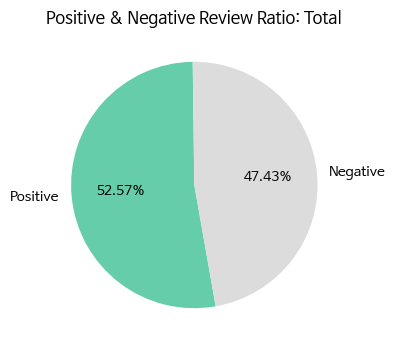

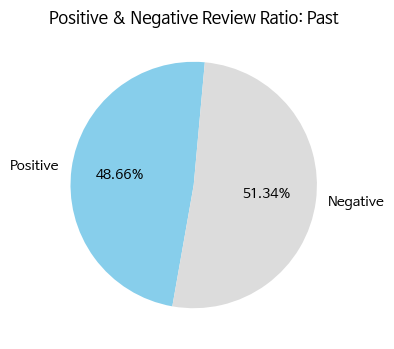

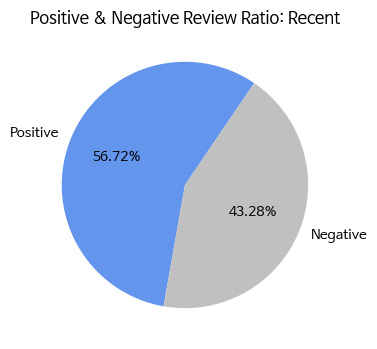

In [ ]:
## Positive & Negative Review Ratio

# Positive & Negative Review
# Total
pos_total_review=total_review[total_review["STAR"]>=3]
neg_total_review=total_review[total_review["STAR"]<3]
# Past
pos_old_review=old_review[old_review["STAR"]>=3]
neg_old_review=old_review[old_review["STAR"]<3]
# Recent
pos_new_review=new_review[new_review["STAR"]>=3]
neg_new_review=new_review[new_review["STAR"]<3]

# Number of Review
# Total
len_total_total_review = len(total_review)
len_pos_total_review = len(pos_total_review)
len_neg_total_review = len(neg_total_review)
# Past
len_total_old_review = len(old_review)
len_pos_old_review = len(pos_old_review)
len_neg_old_review = len(neg_old_review)
# Recent
len_total_new_review = len(new_review)
len_pos_new_review = len(pos_new_review)
len_neg_new_review = len(neg_new_review)

# Visualisation
# Total
plt.figure(figsize=(4, 4))
ratio=[len_pos_total_review, len_neg_total_review]
labels=['Positive','Negative']
colors = ['mediumaquamarine', 'gainsboro']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=280, counterclock=False, colors=colors)
plt.title('Positive & Negative Review Ratio: Total',size=12)
# Past
plt.figure(figsize=(4, 4))
ratio=[len_pos_old_review, len_neg_old_review]
labels=['Positive','Negative']
colors = ['skyblue', 'gainsboro']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Positive & Negative Review Ratio: Past',size=12)
# Recent
plt.figure(figsize=(4, 4))
ratio=[len_pos_new_review, len_neg_new_review]
labels=['Positive','Negative']
colors = ['cornflowerblue', 'silver']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Positive & Negative Review Ratio: Recent',size=12)
plt.show()

## 'LIKE' Analysis

In [ ]:
# LIKE Data Summary
print("Total Review:\n", total_review[["LIKE"]].describe(),"\n")
print("Past Review:\n", old_review[["LIKE"]].describe(),"\n")
print("Recent Review:\n", new_review[["LIKE"]].describe())

Total Review:
               LIKE
count  5948.000000
mean      0.039845
std       0.388059
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      15.000000 

Past Review:
               LIKE
count  3062.000000
mean      0.062051
std       0.520162
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      15.000000 

Recent Review:
               LIKE
count  2886.000000
mean      0.016286
std       0.149215
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       4.000000


<ipython-input-29-774e33f1366c>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Like Ratio', data=like_ratios_df, palette=['skyblue', 'cornflowerblue'])


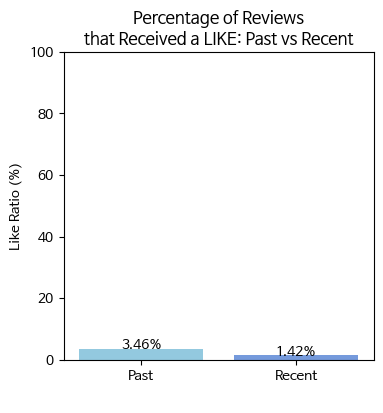

In [ ]:
# LIKE Review Ratio
# Total
like_total_review = total_review[total_review["LIKE"] > 0]
like_total_review = like_total_review.sort_values(ascending=False, by="LIKE")
# Past
like_old_review = old_review[old_review["LIKE"] > 0]
like_old_review = like_old_review.sort_values(ascending=False, by="LIKE")
# Recent
like_new_review = new_review[new_review["LIKE"] > 0]
like_new_review = like_new_review.sort_values(ascending=False, by="LIKE")

# Calculate the ratio of reviews that received a "LIKE"
like_ratios = {
    'Period': ['Past', 'Recent'],
    'Like Ratio': [
        round(len(like_old_review) / len(old_review) * 100, 2),
        round(len(like_new_review) / len(new_review) * 100, 2)
    ]
}

# Create a DataFrame
like_ratios_df = pd.DataFrame(like_ratios)

# Visualization
plt.figure(figsize=(4, 4))
sns.barplot(x='Period', y='Like Ratio', data=like_ratios_df, palette=['skyblue', 'cornflowerblue'])
plt.title('Percentage of Reviews\nthat Received a LIKE: Past vs Recent', size=12)
plt.ylabel('Like Ratio (%)')
plt.xlabel(' ')
plt.ylim(0, 100)  # Set the y-axis range

# Display the ratio value on top of each bar
for index, row in like_ratios_df.iterrows():
    plt.text(index, row['Like Ratio'], f"{row['Like Ratio']}%", color='black', ha="center")

plt.show()


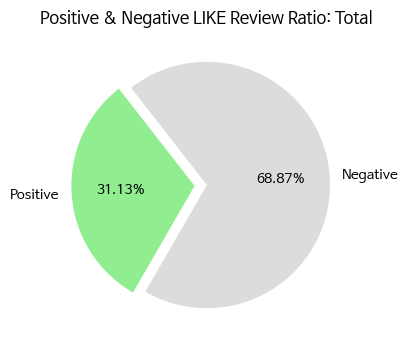

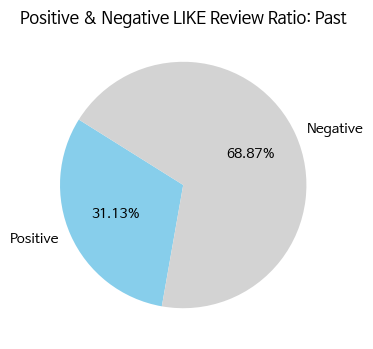

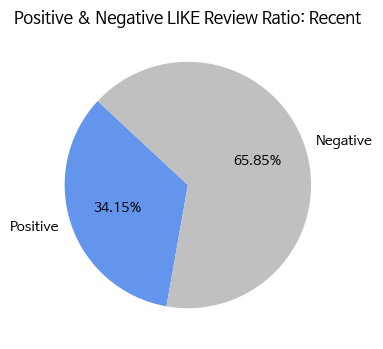

In [ ]:
# like를 받은 리뷰 中 긍정/부정적인 리뷰 비율
# Total
pos_like_total_review=len(like_total_review[like_total_review["STAR"]>=3])
neg_like_total_review=len(like_total_review[like_total_review["STAR"]<3])
# Past
pos_like_old_review=len(like_old_review[like_old_review["STAR"]>=3])
neg_like_old_review=len(like_old_review[like_old_review["STAR"]<3])
# Recent
pos_like_new_review=len(like_new_review[like_new_review["STAR"]>=3])
neg_like_new_review=len(like_new_review[like_new_review["STAR"]<3])

# Visualisation
# Total
plt.figure(figsize=(4, 4))
ratio=[pos_like_old_review, neg_like_old_review]
labels=['Positive','Negative']
colors = ['lightgreen', 'gainsboro']
explode = (0.1, 0)
plt.pie(ratio, labels=labels, explode=explode, autopct='%.2f%%', startangle=240, counterclock=False, colors=colors)
plt.title('Positive & Negative LIKE Review Ratio: Total',size=12)
# Past
plt.figure(figsize=(4, 4))
ratio=[pos_like_old_review, neg_like_old_review]
labels=['Positive','Negative']
colors = ['skyblue', 'lightgray']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Positive & Negative LIKE Review Ratio: Past',size=12)
# Recent
plt.figure(figsize=(4, 4))
ratio=[pos_like_new_review, neg_like_new_review]
labels=['Positive','Negative']
colors = ['cornflowerblue', 'silver']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Positive & Negative LIKE Review Ratio: Recent',size=12)
plt.show()

In [ ]:
# like를 받은 리뷰 中 부정적인 리뷰

# 데이터 병합
like_total_review = pd.concat([like_old_review, like_new_review])
# 데이터 필터링
neg_like_total_review=like_total_review[like_total_review["STAR"]<=2]
neg_like_total_review=neg_like_total_review.sort_values(ascending = False, by="LIKE")
neg_like_total_review[["USER", "STAR", "LIKE", "TITLE","REVIEW"]].head(15)

,USER,STAR,LIKE,TITLE,REVIEW
2701,이아레쿠,1,15,결국 부조리한 게임,"메이플에 대한 애정도 있고, 라이트하게 즐겨서 잘 하곤 있었지만… 결국 이 게임의 ..."
6824,항이염,1,10,와 어떡하지 이 게임을..?,진짜 오랜만에 rpg여서 진짜 기대하고 깔았는데 처음 캐릭터 선택할때 목소리 나오는...
9112,김맛감자칩,1,4,소통 거의 없는 게임 회사,오늘 업데이트 부터 알러 검열 시작됬습니다. 문제는 팍업 기간동안 에플 게등위에게 ...
6847,허위광고 하지 마십쇼,1,4,별 한개도 아깝습니다,"광고에 메이플, 젤다 배껴서 광고하면 좋습니까?\n그렇게 광고해서 관심 끌었으면 제..."
6632,this is reeaaaalllllly amazing,1,3,이딴 게임 만드지마,"유튭에서 이 게임 광고 봤는데 200번 무료 뽑기, 무슨 이상한 용들, 등…\n그거..."
6587,구독취소없으면 취소 된건가요,1,3,며칠전에 처음으로 깔아서 하고있는 유저입니다,광고에서 처음 시작하면 200회 무료뽑기 해준다고해서 \n다운받았는데 무료뽑기 2...
8916,유쯧,1,3,게임 다좋은데,5-2 라이티닝 소녀 개씨발년때문에 접는다
2977,ㅡㅚ마,1,3,메이플 운영자들 리뷰 보기는 하는거임...?,아이폰 유저들 계속 튕김 현상이 일어난다는데 조치 한다는 말도 없고 이대로 입 계속...
6656,조지아말고조져,1,3,사기게임하지마라,유투브 보고 다운햇다\n중국 게임 이래서 하면 안됨 \n장난질 어느 정도 껏해야지\...
8944,승승갓,1,2,정 떨어진 게임,리뷰 그만 지우세요\n지금 5번째 지워진 리뷰인 거 아세요?\n이 게임에 정 다 떨...


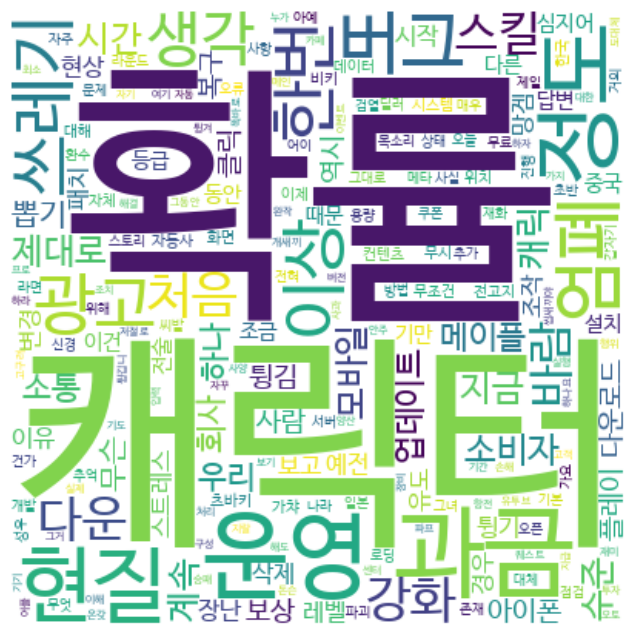

In [ ]:
# like를 받은 리뷰 中 부정적인 리뷰: 워드 클라우드

# 형태소 분석기 초기화
okt = Okt()

# 'TITLE'과 'REVIEW' 컬럼을 결합하여 전체 텍스트 데이터 생성
neg_like_total_review_full_text = " ".join(title + " " + review for title, review in zip(neg_like_total_review['TITLE'], neg_like_total_review['REVIEW']))

# 리뷰에서 명사만 추출
nouns = okt.nouns(neg_like_total_review_full_text)

# 불필요하다고 판단되는 단어 제거 (예시: stopwords 리스트 정의 필요)
stopwords = {"게임", "리뷰", "정말", "진짜", "그냥", "유저","다시","넥슨"}
nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

# 단어의 빈도수 계산
word_counts = Counter(nouns)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(font_path='/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/NanumBarunGothic.ttf',  # 한글 폰트 경로 지정
                      background_color='white',
                      width=400,
                      height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()


## 'LENGTH' Analysis

In [ ]:
# LENGTH Data Summary
print("Total Review:\n", total_review[["total_len"]].describe(),"\n")
print("Past Review:\n", old_review[["total_len"]].describe(),"\n")
print("Recent Review:\n", new_review[["total_len"]].describe())

Total Review:
          total_len
count  5948.000000
mean     73.118023
std      91.201121
min       2.000000
25%      21.000000
50%      48.000000
75%      92.000000
max    2194.000000 

Past Review:
          total_len
count  3062.000000
mean     73.521228
std      90.268079
min       2.000000
25%      23.000000
50%      51.000000
75%      93.000000
max    2194.000000 

Recent Review:
          total_len
count  2886.000000
mean     72.690229
std      92.194465
min       2.000000
25%      20.000000
50%      45.000000
75%      90.000000
max    1144.000000


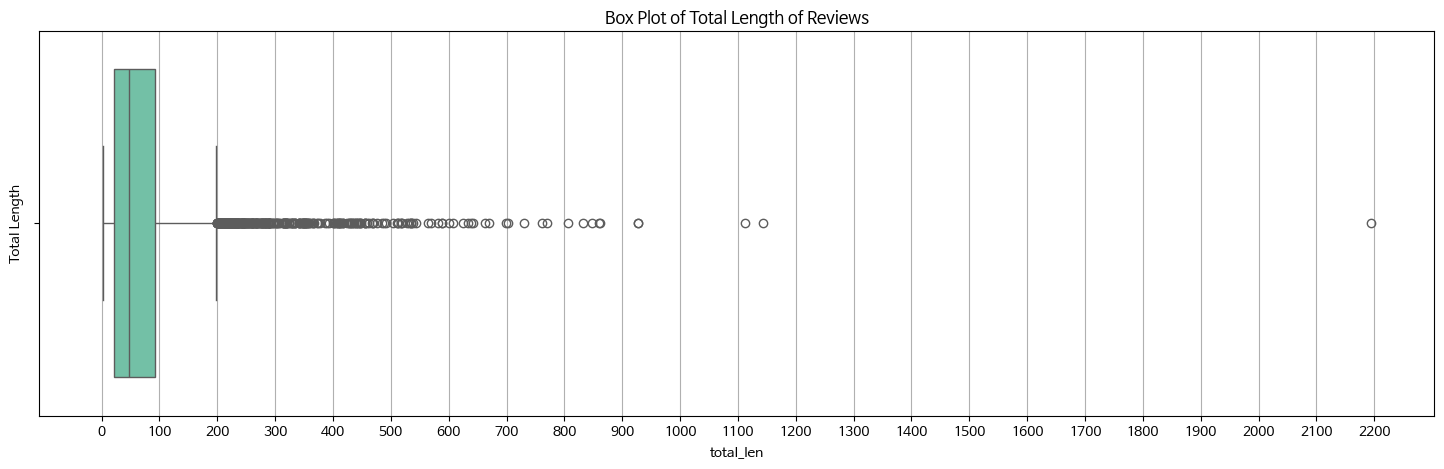

In [ ]:
# Length Distribution
plt.figure(figsize=(18, 5))
plt.grid()
plt.xticks(ticks=np.arange(0, 2300, 100))
sns.boxplot(x=total_review['total_len'], color='mediumaquamarine')
plt.title('Box Plot of Total Length of Reviews', size=12)
plt.ylabel('Total Length')
plt.show()

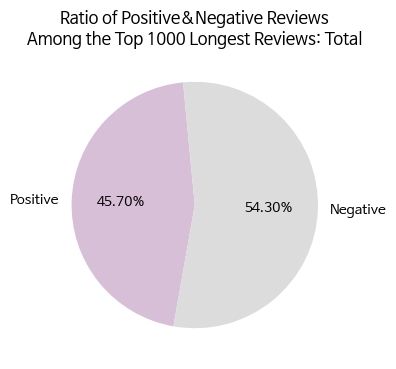

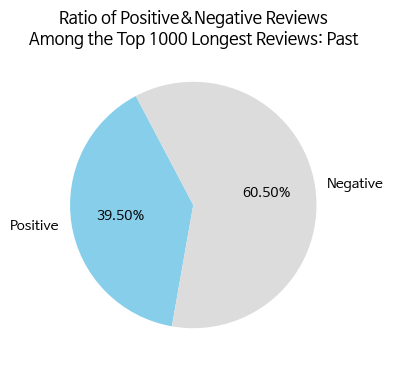

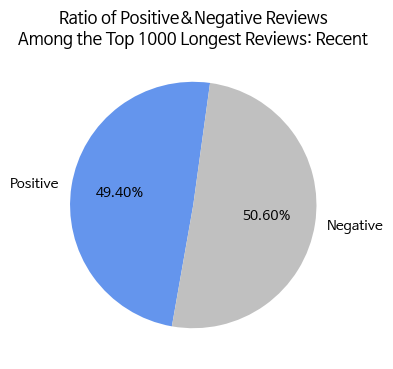

In [ ]:
# Ratio of positive/negative reviews among the top 1000 longest reviews

# The top 1000 longest reviews
# Total
total_len_top1000=total_review.sort_values(by=["total_len"],ascending=False).head(1000)
pos_total_len_top1000=len(total_len_top1000[total_len_top1000["STAR"]>=3])
neg_total_len_top1000=len(total_len_top1000[total_len_top1000["STAR"]<3])
# Past
old_len_top1000=old_review.sort_values(by=["total_len"],ascending=False).head(1000)
pos_old_len_top1000=len(old_len_top1000[old_len_top1000["STAR"]>=3])
neg_old_len_top1000=len(old_len_top1000[old_len_top1000["STAR"]<3])
# Recent
new_len_top1000=new_review.sort_values(by=["total_len"],ascending=False).head(1000)
pos_new_len_top1000=len(new_len_top1000[new_len_top1000["STAR"]>=3])
neg_new_len_top1000=len(new_len_top1000[new_len_top1000["STAR"]<3])

# Visualisation
# Total
plt.figure(figsize=(4, 4))
ratio=[pos_total_len_top1000, neg_total_len_top1000]
labels=['Positive','Negative']
colors = ['thistle', 'gainsboro']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Ratio of Positive&Negative Reviews\nAmong the Top 1000 Longest Reviews: Total',size=12)
# Past
plt.figure(figsize=(4, 4))
ratio=[pos_old_len_top1000, neg_old_len_top1000]
labels=['Positive','Negative']
colors = ['skyblue', 'gainsboro']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Ratio of Positive&Negative Reviews\nAmong the Top 1000 Longest Reviews: Past',size=12)
# Resent
plt.figure(figsize=(4, 4))
ratio=[pos_new_len_top1000, neg_new_len_top1000]
labels=['Positive','Negative']
colors = ['cornflowerblue', 'silver']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Ratio of Positive&Negative Reviews\nAmong the Top 1000 Longest Reviews: Recent',size=12)
plt.show()

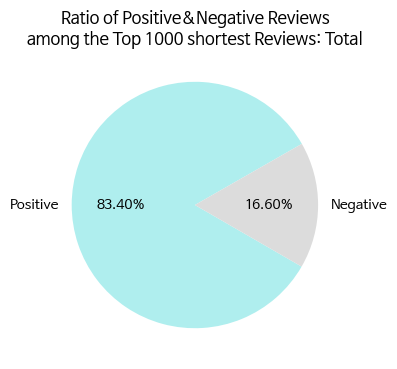

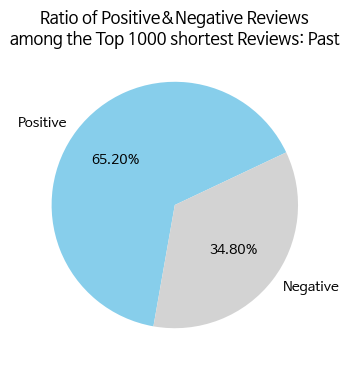

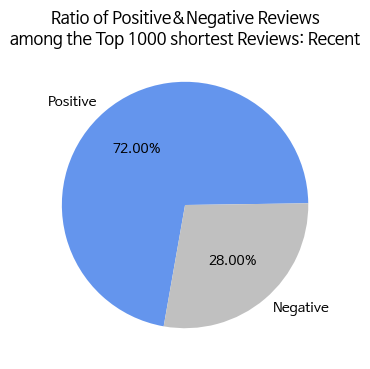

In [ ]:
# Ratio of positive/negative reviews among the top 1000 shortest reviews

# The top 1000 shortest reviews
# Total
total_len_bottom1000=total_review.sort_values(by=["total_len"],ascending=False).tail(1000)
pos_total_len_bottom1000=len(total_len_bottom1000[total_len_bottom1000["STAR"]>=3])
neg_total_len_bottom1000=len(total_len_bottom1000[total_len_bottom1000["STAR"]<3])
# Past
old_len_bottom1000=old_review.sort_values(by=["total_len"],ascending=False).tail(1000)
pos_old_len_bottom1000=len(old_len_bottom1000[old_len_bottom1000["STAR"]>=3])
neg_old_len_bottom1000=len(old_len_bottom1000[old_len_bottom1000["STAR"]<3])
# Recent
new_len_bottom1000=new_review.sort_values(by=["total_len"],ascending=False).tail(1000)
pos_new_len_bottom1000=len(new_len_bottom1000[new_len_bottom1000["STAR"]>=3])
neg_new_len_bottom1000=len(new_len_bottom1000[new_len_bottom1000["STAR"]<3])

# Visualisation
# Total
plt.figure(figsize=(4, 4))
ratio=[pos_total_len_bottom1000, neg_total_len_bottom1000]
labels=['Positive','Negative']
colors = ['paleturquoise', 'gainsboro']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=330, counterclock=False, colors=colors)
plt.title('Ratio of Positive&Negative Reviews\namong the Top 1000 shortest Reviews: Total',size=12)
# Past
plt.figure(figsize=(4, 4))
ratio=[pos_old_len_bottom1000, neg_old_len_bottom1000]
labels=['Positive','Negative']
colors = ['skyblue', 'lightgray']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Ratio of Positive&Negative Reviews\namong the Top 1000 shortest Reviews: Past',size=12)
# Resent
plt.figure(figsize=(4, 4))
ratio=[pos_new_len_bottom1000, neg_new_len_bottom1000]
labels=['Positive','Negative']
colors = ['cornflowerblue', 'silver']
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False, colors=colors)
plt.title('Ratio of Positive&Negative Reviews\namong the Top 1000 shortest Reviews: Recent',size=12)
plt.show()

## 'USER' Analysis

In [ ]:
# USER Data Summary
print("Total Review:\n", total_review[["USER"]].describe(),"\n")
print("Past Review:\n", old_review[["USER"]].describe(),"\n")
print("Recent Review:\n", new_review[["USER"]].describe())

Total Review:
          USER
count    5948
unique   5483
top     밀크냥냥이
freq        4 

Past Review:
         USER
count   3062
unique  2938
top      쪼끔e
freq       3 

Recent Review:
               USER
count         2886
unique        2583
top     hadigreece
freq             3


Text(0.5, 1.0, 'Percentage of Users\nWho Wrote More Than Two Reviews')

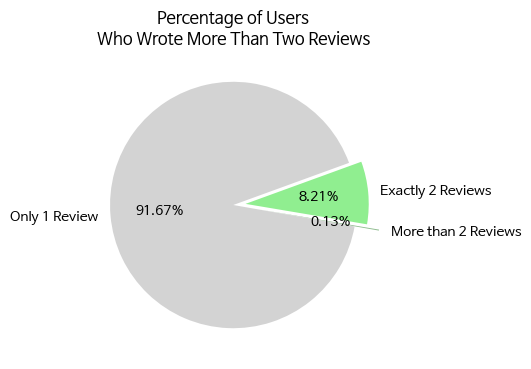

In [ ]:
## Percentage of Users Who Wrote More Than Two Reviews

# Calculate the number of reviews per user
user_review_counts = total_review['USER'].value_counts()
only_1_review_count = user_review_counts[user_review_counts == 1].count()
exactly_2_reviews_count = user_review_counts[user_review_counts == 2].count()
more_than_2_reviews_count = user_review_counts[user_review_counts > 2].count()

# Visualisation
plt.figure(figsize=(4, 4))
ratio=[exactly_2_reviews_count, more_than_2_reviews_count, only_1_review_count]
labels = ['Exactly 2 Reviews', 'More than 2 Reviews', 'Only 1 Review']
colors = ['lightgreen', 'darkseagreen', 'lightgray']
explode = (0.1, 0.2, 0)
plt.pie(ratio, explode=explode, labels=labels, autopct='%.2f%%', startangle=20, counterclock=False, colors=colors)
plt.title('Percentage of Users\nWho Wrote More Than Two Reviews',size=12)


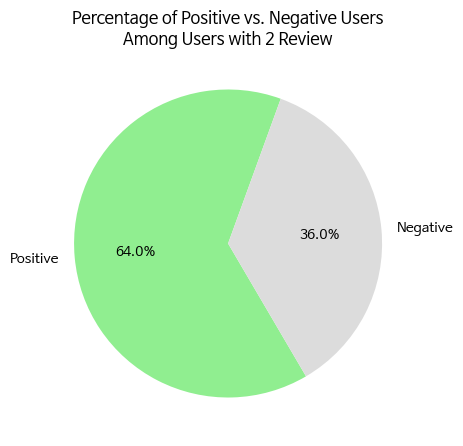

In [ ]:
# 리뷰를 2개 이상 작성한 사용자의 데이터 필터링
exactly_2_review_data = total_review[total_review['USER'].isin(user_review_counts[user_review_counts == 2].index)]

# 사용자별 별점(STAR) 평균 계산
exactly_2_review_user_avg_stars = exactly_2_review_data.groupby('USER')['STAR'].mean()

# Positive (평균 별점 3 이상) 및 Negative (평균 별점 3 미만) 사용자 분류
pos_exactly_2_review_users = exactly_2_review_user_avg_stars[exactly_2_review_user_avg_stars >= 3]
neg_exactly_2_review_users = exactly_2_review_user_avg_stars[exactly_2_review_user_avg_stars < 3]

# 시각화
labels = ['Positive', 'Negative']
sizes = [len(pos_exactly_2_review_users), len(neg_exactly_2_review_users)]
colors = ['lightgreen', 'gainsboro']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=70)
plt.title('Percentage of Positive vs. Negative Users\nAmong Users with 2 Review', size=12)
plt.show()



In [ ]:
# 2개 초과 리뷰를 작성한 USER
more_than_2_review = total_review.groupby("USER").count().reset_index()[["USER","REVIEW"]].sort_values(by=["REVIEW"],ascending=False)
more_than_2_review = more_than_2_review[more_than_2_review["REVIEW"]>2]
more_than_2_review.head(10)

,USER,REVIEW
2911,밀크냥냥이,4
4469,전략맨,3
2183,닝기리좆또,3
4727,쪼끔e,3
4279,이겜별로임,3
4115,우치하린,3
762,hadigreece,3


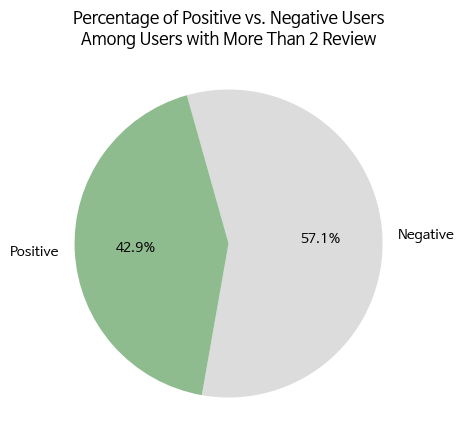

In [ ]:
# Identify users who have written more than 3 reviews
users_with_more_than_2_reviews = user_review_counts[user_review_counts > 2].index

# Filter the original dataframe to include only data from users who have written more than 3 reviews
more_than_2_review_data = total_review[total_review['USER'].isin(users_with_more_than_2_reviews)]

# Calculate the average STAR rating for each user
user_avg_star = more_than_2_review_data.groupby('USER')['STAR'].mean().reset_index()

# Categorize the average STAR rating as 'Positive' if it's 3 or above, and 'Negative' if it's below 3
user_avg_star['Rating_Category'] = ['Positive' if star >= 3 else 'Negative' for star in user_avg_star['STAR']]

# Calculate the number of users with 'Positive' and 'Negative' ratings
rating_counts = user_avg_star['Rating_Category'].value_counts()

# Visualization
plt.figure(figsize=(5, 5))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=260, colors = ['gainsboro', 'darkseagreen'])
plt.title('Percentage of Positive vs. Negative Users\nAmong Users with More Than 2 Review')
plt.show()


In [ ]:
# 리뷰 3개 이상 작성 유저
above_3_revie_user=total_review[total_review["USER"].str.contains("밀크냥냥이|전략맨|닝기리좆또|쪼끔e|이겜별로임|우치하린|hadigreece")]
above_3_revie_user=above_3_revie_user.sort_values(by=["USER"],ascending=False)
above_3_revie_user[["USER", "STAR", "LIKE", "GAME", "TITLE","REVIEW"]]

,USER,STAR,LIKE,GAME,TITLE,REVIEW
5938,쪼끔e,1,0,리니지m,스킬?,스킬을 못배우는데 강화를???
3839,쪼끔e,5,0,오딘발할라라이징,오딘짱,짱먹어라
4306,쪼끔e,5,0,오딘발할라라이징,오딘짱,짱먹어라
4179,전략맨,1,0,오딘발할라라이징,진짜 너무하다 싶은 게임,인첸 개 극악이고\n돈도 어정쩡 아이템드랍도 어정쩡 아니면 아예 주질 않네요\n결국...
3711,전략맨,1,0,오딘발할라라이징,진짜 너무하다 싶은 게임,인첸 개 극악이고\n돈도 어정쩡 아이템드랍도 어정쩡 아니면 아예 주질 않네요\n결국...
136,전략맨,5,0,검은사막,현재까지는…,아직 초반이라서 재미있긴해요\n안정화도 오딘 망할게임에 비하면 확실히 좋네요\n이제...
4278,이겜별로임,1,0,오딘발할라라이징,다운로드받다 빡쳐서 지움,다운로드 1시간 넘게하다 끝났는데 또 다운로드있네 걍 안한다 시작하려면 다운로드 몇...
3810,이겜별로임,1,0,오딘발할라라이징,다운로드받다 빡쳐서 지움,다운로드 1시간 넘게하다 끝났는데 또 다운로드있네 걍 안한다 시작하려면 다운로드 몇...
6876,이겜별로임,1,0,히어로즈테일즈,최악,시작하자마자 직업선택 목소리 듣고 중국산 싸구려게임 이구나 알아차림
3795,우치하린,5,0,오딘발할라라이징,역시 카카오,오딘 잼있네요 근데 아이폰 스크린 양끝으로 짤리는건 나만 그런가..


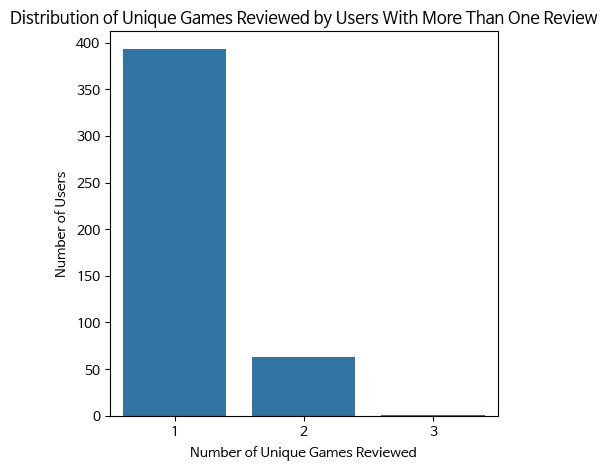

In [ ]:
# more than 1 review users game

# Identify users who have written more than 1 review
users_with_more_than_1_review = user_review_counts[user_review_counts > 1].index

# Now, filter reviews made by these users.
gameby_users_with_more_than_1_review = total_review[total_review['USER'].isin(users_with_more_than_1_review)].groupby('USER')['GAME'].nunique()
gameby_users_with_more_than_1_review = gameby_users_with_more_than_1_review.value_counts().sort_index()

# Now we can visualize this information.
plt.figure(figsize=(5, 5))
sns.barplot(x=gameby_users_with_more_than_1_review.index, y=gameby_users_with_more_than_1_review.values)
plt.title('Distribution of Unique Games Reviewed by Users With More Than One Review')
plt.xlabel('Number of Unique Games Reviewed')
plt.ylabel('Number of Users')
plt.show()


## 'DATE' Analysis

<ipython-input-44-e61defe34fc0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="TITLE",data=hour_table, palette='YlGnBu')


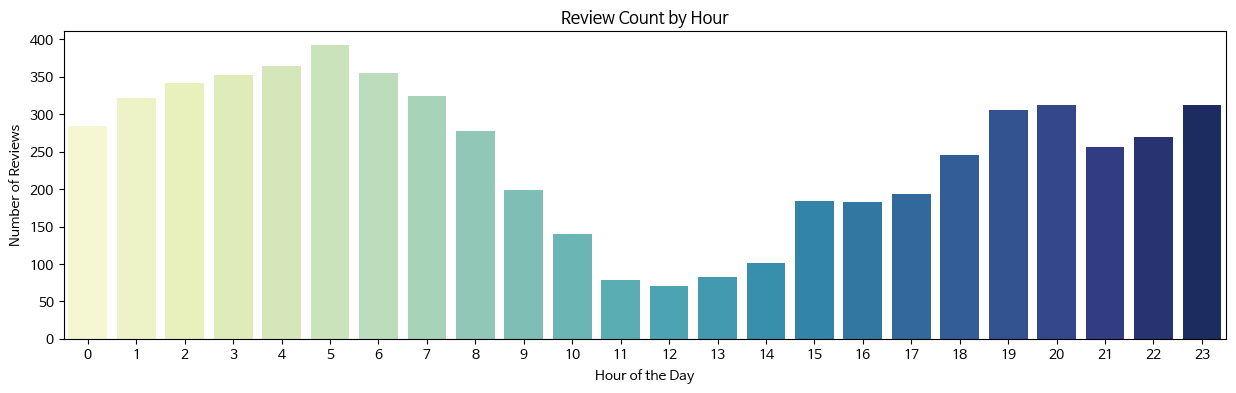

In [ ]:
# Review Submission Times

def data_groupby_time(column_name):
  data_all=total_review.groupby(column_name).count().reset_index()[[column_name,"TITLE"]]
  return data_all

hour_table=data_groupby_time("hour")
plt.figure(figsize=(15,4))
sns.barplot(x="hour", y="TITLE",data=hour_table, palette='YlGnBu')
plt.title('Review Count by Hour', size=12)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Reviews')
plt.show()

# Analysis by 'GAME'

<ipython-input-45-b05065171fd2>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_past = sns.barplot(x="GAME", y="STAR_old", data=merged_df, palette=colors_past)


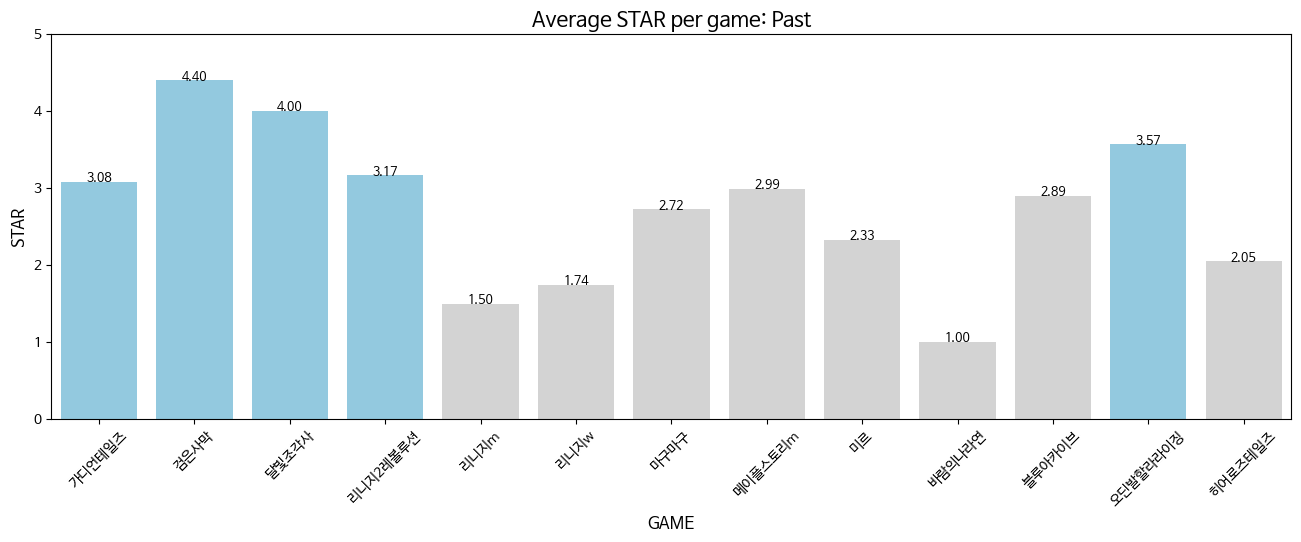

<ipython-input-45-b05065171fd2>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_new = sns.barplot(x="GAME", y="STAR_new", data=merged_df, palette=colors_new)


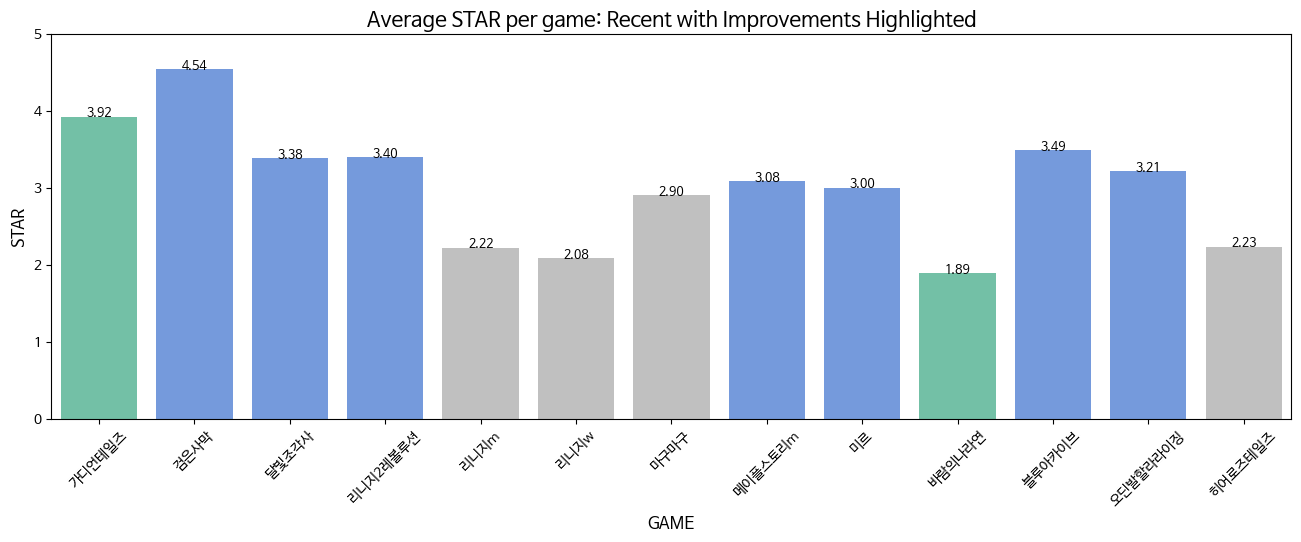

In [ ]:
## Distinguishing Between Positive & Negative Game Reviews: Past & Recent

# Assuming 'old_review' and 'new_review' DataFrames contain 'GAME' and 'STAR' columns,
# and you want to calculate the average 'STAR' rating for each game in the past and recent data.

# Calculate the average 'STAR' rating by game for past data
old_star_mean = old_review.groupby("GAME")['STAR'].mean().reset_index().rename(columns={'STAR': 'STAR_old'})

# Calculate the average 'STAR' rating by game for recent data
new_star_mean = new_review.groupby("GAME")['STAR'].mean().reset_index().rename(columns={'STAR': 'STAR_new'})


def plot_average_stars_with_improvement_for_both_periods(old_df, new_df, improvement_threshold=0.8, threshold=3):
    # 과거 데이터와 최근 데이터 병합
    merged_df = pd.merge(old_df, new_df, on="GAME", suffixes=('_old', '_new'))
    merged_df['Rating_Improvement'] = merged_df['STAR_new'] - merged_df['STAR_old']

    # 과거 데이터 시각화
    plt.figure(figsize=(16, 5))
    colors_past = ['skyblue' if star >= threshold else 'lightgray' for star in merged_df['STAR_old']]
    ax_past = sns.barplot(x="GAME", y="STAR_old", data=merged_df, palette=colors_past)
    plt.xlabel("GAME", size=12)
    plt.ylabel("STAR", size=12)
    plt.title('Average STAR per game: Past', size=15)
    for p in ax_past.patches:
        height = p.get_height()
        ax_past.text(p.get_x() + p.get_width() / 2., height, '{:.2f}'.format(height), ha='center', size=9)
    ax_past.set_ylim(0, 5)
    plt.xticks(rotation=45)
    plt.show()

    # 최근 데이터 시각화 (개선된 게임 강조)
    plt.figure(figsize=(16, 5))
    colors_new = ['mediumaquamarine' if diff >= improvement_threshold else ('cornflowerblue' if star >= threshold else 'silver')
                  for star, diff in zip(merged_df['STAR_new'], merged_df['Rating_Improvement'])]
    ax_new = sns.barplot(x="GAME", y="STAR_new", data=merged_df, palette=colors_new)
    plt.xlabel("GAME", size=12)
    plt.ylabel("STAR", size=12)
    plt.title('Average STAR per game: Recent with Improvements Highlighted', size=15)
    for p in ax_new.patches:
        height = p.get_height()
        ax_new.text(p.get_x() + p.get_width() / 2., height, '{:.2f}'.format(height), ha='center', size=9)
    ax_new.set_ylim(0, 5)
    plt.xticks(rotation=45)
    plt.show()

# 함수 호출
plot_average_stars_with_improvement_for_both_periods(old_star_mean, new_star_mean)


## 최상위 & 최하위 평점 게임

In [ ]:
# Top-rated game: 검은사막
blackdesert_review = new_review[new_review['GAME'] == '검은사막']
blackdesert_review[["USER", "STAR", "LIKE", "TITLE","REVIEW"]]

,USER,STAR,LIKE,TITLE,REVIEW
0,양이45,5,0,그래픽,"전투스킬도 좋아요,캐릭터 마다 전투력 너무좋아요"
1,소모품열쇠,5,0,부모님 모르게 산 주식,펄어비스
2,료어,5,0,오류,오랜만에 다시할려고 들어갔는데 추가로필요한 데이터 다운받는데 자꾸 오류가뜨네여ㅜ
3,드리르,5,0,굳,굳
4,제트플립갖고싶은아이폰유저,5,0,재밌어요,원래 게임 안하는 사람인데 주말에 할게 없어서 처음 깔아서 해봤는데 재밌습니다 현질...
...,...,...,...,...,...
3513,fufumman,5,0,재미있어용,재밌어요 아직 적응 중이지만
3514,뉴코오라이쿠,5,0,재밌어요,재밌어요
3515,흐드크,5,0,복귀,검은 사막 모바일을 다시 시작하려 하는데 이전에 햇던 기록이 없어져서 그런데 서버가...
3516,ㅏㅏㅏ나로거야터,5,0,실행,게임실행이 안되요…


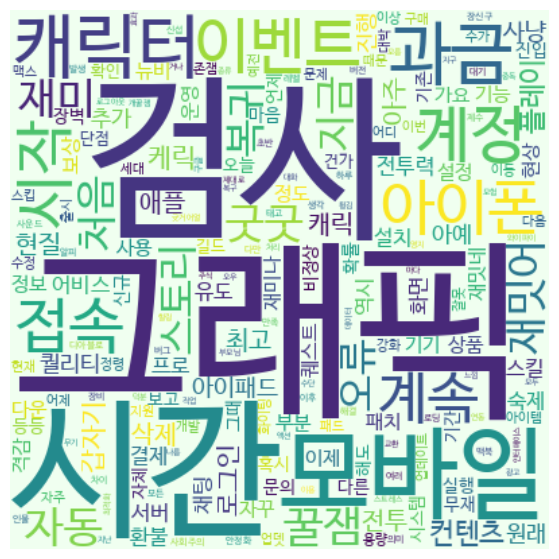

In [ ]:
# Top-rated game Word Cloud: 검은사막

# Initialize the morpheme analyser
okt = Okt()

# Combine 'TITLE' and 'REVIEW' columns to create a complete text dataset
blackdesert_review_full_text = " ".join(title + " " + review for title, review in zip(blackdesert_review['TITLE'], blackdesert_review['REVIEW']))

# Extract only nouns from the reviews
nouns = okt.nouns(blackdesert_review_full_text)

# Remove words deemed unnecessary (a stopwords list needs to be defined)
stopwords = {"게임", "리뷰", "정말", "진짜", "그냥", "유저","다시","한번","사람","사막"}
nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

# Calculate word frequencies
word_counts = Counter(nouns)

# Create a WordCloud object
wordcloud = WordCloud(font_path='/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/NanumBarunGothic.ttf',
                      background_color='honeydew',
                      width=400,
                      height=400).generate_from_frequencies(word_counts)

# Visualize the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


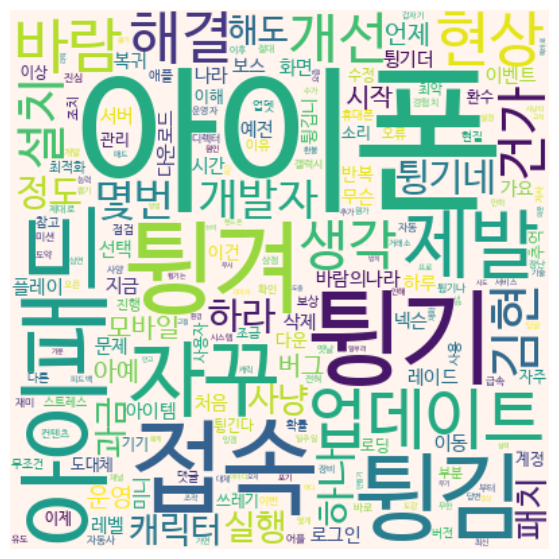

In [ ]:
# Bottom-rated game: 바람의 나라 연
wind_review = new_review[new_review['GAME'] == '바람의나라연']

# Initialize the morpheme analyser
okt = Okt()

# Combine 'TITLE' and 'REVIEW' columns to create a complete text dataset
wind_review_full_text = " ".join(title + " " + review for title, review in zip(wind_review['TITLE'], wind_review['REVIEW']))

# Extract only nouns from the reviews
nouns = okt.nouns(wind_review_full_text)

# Remove words deemed unnecessary (a stopwords list needs to be defined)
stopwords = {"게임", "리뷰", "정말", "진짜", "그냥", "유저","다시","한번","사람","계속"}
nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

# Calculate word frequencies
word_counts = Counter(nouns)

# Create a WordCloud object
wordcloud = WordCloud(font_path='/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/NanumBarunGothic.ttf',
                      background_color='seashell',
                      width=400,
                      height=400).generate_from_frequencies(word_counts)

# Visualize the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


## 급격하게 평점 상승한 게임

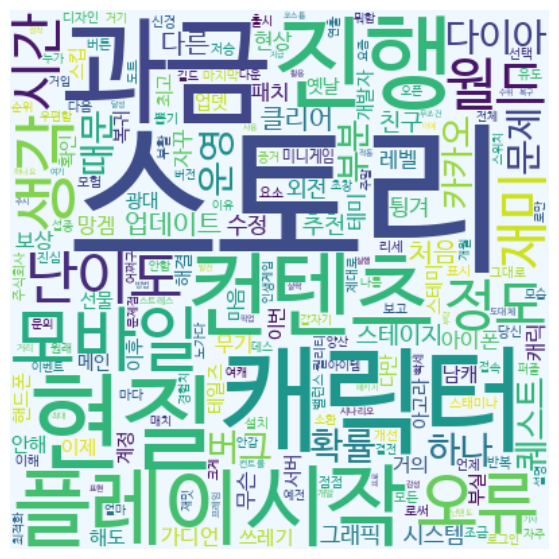

In [ ]:
# Highly rated games Word Cloud (Recent): 가디언테일즈

# Filter reviews for "가디언테일즈"
guardian_new_reviews = new_review[new_review['GAME'] == '가디언테일즈']

# Initialize the morpheme analyser
okt = Okt()

# Combine 'TITLE' and 'REVIEW' columns to create a complete text dataset
guardian_new_reviews_full_text = " ".join(title + " " + review for title, review in zip(guardian_new_reviews['TITLE'], guardian_new_reviews['REVIEW']))

# Extract only nouns from the reviews
nouns = okt.nouns(guardian_new_reviews_full_text)

# Remove words deemed unnecessary (a stopwords list needs to be defined)
stopwords = {"게임", "리뷰", "정말", "진짜", "그냥", "유저","다시","한번","사람","제발","계속","지금"}
nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

# Calculate word frequencies
word_counts = Counter(nouns)

# Create a WordCloud object
wordcloud = WordCloud(font_path='/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/NanumBarunGothic.ttf',
                      background_color='aliceblue',
                      width=400,
                      height=400).generate_from_frequencies(word_counts)

# Visualize the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


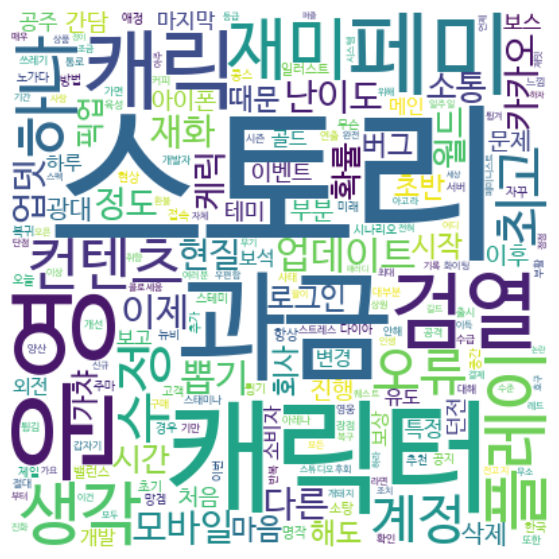

In [ ]:
# Highly rated games Word Cloud (Past): 가디언테일즈

# Filter reviews for "가디언테일즈"
guardian_old_reviews = old_review[old_review['GAME'] == '가디언테일즈']

# Initialize the morpheme analyser
okt = Okt()

# Combine 'TITLE' and 'REVIEW' columns to create a complete text dataset
guardian_old_reviews_full_text = " ".join(title + " " + review for title, review in zip(guardian_old_reviews['TITLE'], guardian_old_reviews['REVIEW']))

# Extract only nouns from the reviews
nouns = okt.nouns(guardian_old_reviews_full_text)

# Remove words deemed unnecessary (a stopwords list needs to be defined)
stopwords = {"게임", "리뷰", "정말", "진짜", "그냥", "유저","다시","한번","사람","제발","계속","지금","가디언","테일즈"}
nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

# Calculate word frequencies
word_counts = Counter(nouns)

# Create a WordCloud object
wordcloud = WordCloud(font_path='/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/NanumBarunGothic.ttf',
                      background_color='white',
                      width=400,
                      height=400).generate_from_frequencies(word_counts)

# Visualize the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


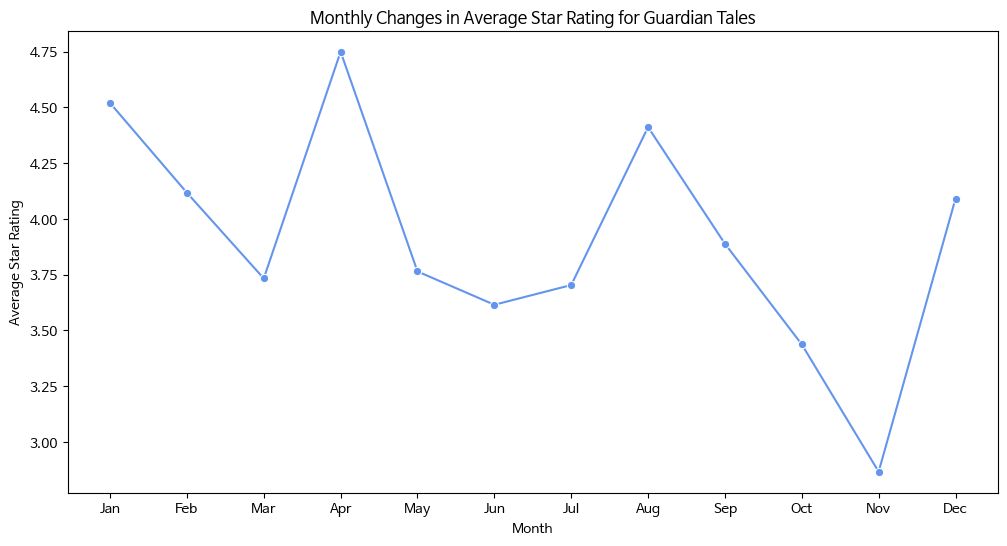

In [ ]:
# Highly rated games 월별 평점 변화: 가디언테일즈

# Group by 'month' and calculate the average 'STAR' rating
guardian_monthly_avg_star = guardian_new_reviews.groupby('month')['STAR'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=guardian_monthly_avg_star, x='month', y='STAR', marker='o', color='cornflowerblue')
plt.title('Monthly Changes in Average Star Rating for Guardian Tales')
plt.xlabel('Month')
plt.ylabel('Average Star Rating')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()



## 평점 하락 게임 개선방향

In [ ]:
## 평균 평점 상승&하락 게임 구분

# 게임별 평균 별점을 하나의 데이터프레임으로 병합
star_mean_merged = pd.merge(old_star_mean, new_star_mean, on='GAME', suffixes=('_old', '_new'))

# 평균 별점의 변화 계산
star_mean_merged['STAR_change'] = star_mean_merged['STAR_new'] - star_mean_merged['STAR_old']

# 상승한 게임과 하락한 게임 구분
star_increase = star_mean_merged[star_mean_merged['STAR_change'] > 0]
star_decrease = star_mean_merged[star_mean_merged['STAR_change'] < 0]

# 결과 출력
print("Games with Increased Average STAR:")
print(star_increase[['GAME', 'STAR_change']])

print("\nGames with Decreased Average STAR:")
print(star_decrease[['GAME', 'STAR_change']])

Games with Increased Average STAR:
        GAME  STAR_change
0     가디언테일즈     0.843656
1       검은사막     0.141613
3   리니지2레볼루션     0.233333
4       리니지m     0.726123
5       리니지w     0.346287
6       마구마구     0.178064
7    메이플스토리m     0.096757
8         미르     0.674699
9     바람의나라연     0.892276
10    블루아카이브     0.592053
12   히어로즈테일즈     0.184342

Games with Decreased Average STAR:
        GAME  STAR_change
2      달빛조각사    -0.615385
11  오딘발할라라이징    -0.353519


In [ ]:
# 평점 하락 게임 분석: 달빛조각사, 오딘발할라라이징
declined_mean_star_moonlight = new_review[new_review["GAME"].str.contains("달빛조각사")]
declined_mean_star_odin = new_review[new_review["GAME"].str.contains("오딘발할라라이징")]

In [ ]:
# 평점 하락 게임 리뷰 확인: 달빛조각사
declined_mean_star_moonlight[["USER", "STAR", "LIKE", "GAME", "TITLE","REVIEW"]]

,USER,STAR,LIKE,GAME,TITLE,REVIEW
8276,가람비야,4,0,달빛조각사,잼나게 다시 도전 중,다시 시작하고 있어요
8277,dkrak2,1,0,달빛조각사,별 1개도 아까운..,"경험치,아이템드랍확률,골드 드랍률 전부\n결제를 해야지 오르고,\n 인벤토리 무게 ..."
8278,선택장애 있는데 별명 어케 정해,1,0,달빛조각사,진심?,에효 리뷰 적는건 처음이네…게임은 잘하고 있습니다. 문제는 연결이 자꾸 끊겨요. 제...
8279,룽강,5,0,달빛조각사,재밋네,할만하네요 재밋어요
8280,aiguyaaiguya,4,0,달빛조각사,재밌긴한데…..,서버가 불안정한지 게임중에 튕겨나가는 횟수가 많네요. 그리고 지역마다 최종보스급몬스...
8281,반반치맥,2,0,달빛조각사,튕김 현상좀,퉝김 튕김
8282,현질전문가 우도쿤,5,0,달빛조각사,별다섯개로 올려야 보이니까 남깁니다,히든퀘스트 같은경우에\n\n자원캐는 미션이 주로 있습니다\n\n특정맵에서 특정좌표로...
8283,홀롤로로로로롤,1,0,달빛조각사,겜 실행좀,실행이 안되는데 빨리 수정좀 해주세요
8284,도레미파솔파파,5,0,달빛조각사,핵,존잼
8285,남색동동이,5,0,달빛조각사,너무 재미있는데,너~무 재미있는데 계속 튕기거나 랙이 좀 걸려서 쪼~금 아쉬워요 그것 빼고는 정말 ...


In [ ]:
# 평점 하락 게임 리뷰 확인: 오딘발할라라이징
declined_mean_star_odin[["USER", "STAR", "LIKE",  "GAME", "TITLE","REVIEW"]]

,USER,STAR,LIKE,GAME,TITLE,REVIEW
3500,로더기,5,0,오딘발할라라이징,영웅좀주세여ㅜ,와이리 안줍니까 처음에 영웅안줘서 접엇다 다시시작하는데 부탁함다
3501,검은사-----망,1,0,오딘발할라라이징,정기점검 긴급점검,점검은 뭐하러 한데요\n버그 투성인데\n점검하고나면 게임이 더 이상해
3502,ID좀비,5,0,오딘발할라라이징,오딘이란게임,정말재미있네요
3503,완전재미있음요,1,0,오딘발할라라이징,오딘일년째인데,좋은아이템은 한번을못먹네요 ㅡㅡㅋ
3504,gowoonsky34871,5,0,오딘발할라라이징,내가왜이제야 이걸알았노,잼다
...,...,...,...,...,...,...
4228,네넨네,5,0,오딘발할라라이징,너무 재밌어요,너무 즐겁게 게임하고있어요
4229,김아우라,4,0,오딘발할라라이징,청약철회 요청,펫 + 200다이아\n 펫 무제한인줄알고 샀는데 기간제네요\n철회 바로 부탁드릴게요...
4230,o나무늘보o,1,0,오딘발할라라이징,이제까지 쭉 잘 됐는데 왜 로그아웃 되나요?,지금까지 잘 되다가 왜 하루아침에 연령이 안되서 로그아웃 됐는데 무슨 문제인가요?
4231,copa8888,5,0,오딘발할라라이징,네트워크불안정 설치오류,집에서 피시는 설치 잘 되는데 모바일은 계속 오류로 패치를 못하네요 잠깐 그려러니 ...


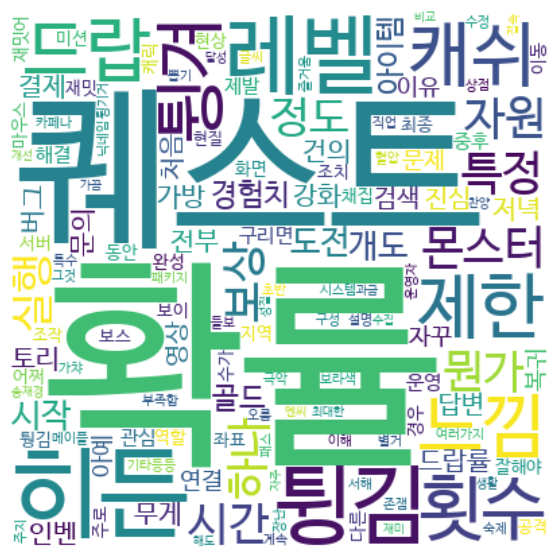

In [ ]:
# 평점 하락 게임 워드 클라우드: 달빛조각사

# 형태소 분석기 초기화
okt = Okt()

# 'TITLE'과 'REVIEW' 컬럼을 결합하여 전체 텍스트 데이터 생성
declined_mean_star_moonlight_full_text = " ".join(title + " " + review for title, review in zip(declined_mean_star_moonlight['TITLE'], declined_mean_star_moonlight['REVIEW']))

# 리뷰에서 명사만 추출
nouns = okt.nouns(declined_mean_star_moonlight_full_text)

# 불필요하다고 판단되는 단어 제거 (불용어 목록 정의 필요)
stopwords = {"게임", "리뷰", "정말", "진짜", "그냥", "유저","다시","한번","사람"}
nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

# 단어의 빈도수 계산
word_counts = Counter(nouns)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(font_path='/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/NanumBarunGothic.ttf',  # 한글 폰트 경로를 지정해야 합니다.
                      background_color='white',
                      width=400,
                      height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:

moonlight_contains_factor = declined_mean_star_moonlight[(declined_mean_star_moonlight['REVIEW'].str.contains('퀘스트'or'확률', na=False)) | (declined_mean_star_moonlight['TITLE'].str.contains('퀘스트'or'확률', na=False))]
moonlight_contains_factor[["USER", "STAR", "LIKE", "GAME", "TITLE","REVIEW"]]


,USER,STAR,LIKE,GAME,TITLE,REVIEW
8280,aiguyaaiguya,4,0,달빛조각사,재밌긴한데…..,서버가 불안정한지 게임중에 튕겨나가는 횟수가 많네요. 그리고 지역마다 최종보스급몬스...
8282,현질전문가 우도쿤,5,0,달빛조각사,별다섯개로 올려야 보이니까 남깁니다,히든퀘스트 같은경우에\n\n자원캐는 미션이 주로 있습니다\n\n특정맵에서 특정좌표로...


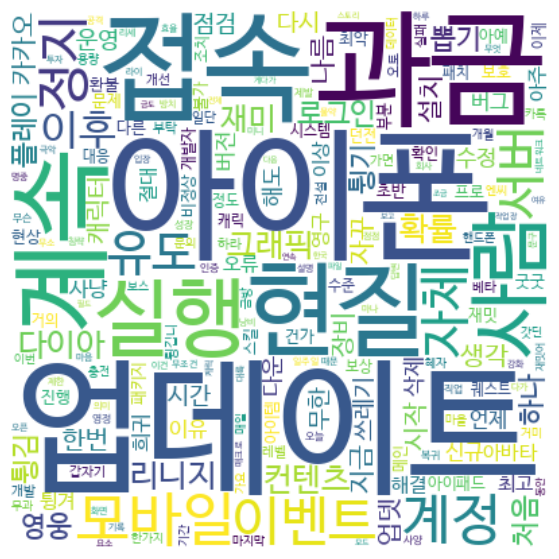

In [ ]:
# 평점 하락 게임 워드 클라우드: 오딘발할라라이징

# 형태소 분석기 초기화
okt = Okt()

# 'TITLE'과 'REVIEW' 컬럼을 결합하여 전체 텍스트 데이터 생성
declined_mean_star_odin_full_text = " ".join(title + " " + review for title, review in zip(declined_mean_star_odin['TITLE'], declined_mean_star_odin['REVIEW']))

# 리뷰에서 명사만 추출
nouns = okt.nouns(declined_mean_star_odin_full_text)

# 불필요하다고 판단되는 단어 제거 (불용어 목록 정의 필요)
stopwords = {"게임", "리뷰", "정말", "진짜", "그냥", "유저","오딘"}
nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]

# 단어의 빈도수 계산
word_counts = Counter(nouns)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(font_path='/content/drive/MyDrive/데이터 분석/데이터 테이블/게임 리뷰/NanumBarunGothic.ttf',  # 한글 폰트 경로를 지정해야 합니다.
                      background_color='white',
                      width=400,
                      height=400).generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:
# 평점 하락 게임 리뷰 확인: 오딘발할라라이징

odin_contains_factor = declined_mean_star_odin[(declined_mean_star_odin['REVIEW'].str.contains('업데이트'or'과금'or'아이폰', na=False)) | (declined_mean_star_odin['TITLE'].str.contains('업데이트'or'과금'or'아이폰', na=False))]
odin_contains_factor[["USER", "STAR", "LIKE", "TITLE","REVIEW"]].tail(10)


,USER,STAR,LIKE,TITLE,REVIEW
4093,837 203 224,3,0,ios 16.0 업데이트 접속 불가,ios 16.0 새벽에 업데이트 했는데 \n접속이 안되네요 ㅠㅠ 언제 고쳐 주실건가요??
4094,밥먹었니1,3,0,아이폰 업데이트이후 접속안됨,저만그런가요???
4097,호두아빠야,5,0,ios16 업데이트,ios16 버전 실행이안됩니다
4099,월도랑,3,0,아이폰 업데이트,아이폰 iOS 16.0 (20A362) 버젼 업데이트 해주세요. 접속이 안되고 팅겨요
4134,걱정되에에에,3,0,오딘 운영진분들 제발좀 봣으면 좋겟다,컨텐츠야 mmorpg 라 한정적인거 이해하겟어 신규대륙나오고 좋다이거야 근데 너무 ...
4145,진심인나,1,0,업데이트이후 아이패드에서 안됩니다.,이거뭐 업데이트 할때마다 제대로 되는게없어요?\n다른 게임마스터처럼 게임좀 하시면서...
4153,이동진이에용,1,0,인류최악의게임,1.도가 지나친 과금유도\n- 일정수준 과금을 하지않으면 없는중 그나마 있는 컨텐츠...
4203,히도도,5,0,운영자들 보세요,뭐 게임을 할려해도 팅김현상이 많아서 할수가있어야죠 캐릭터 많은곳들 가면 게속 팅기...
4210,남극흰곰,5,0,엔c에 지친 사람에게 강력추천!!,린m 심각한 과금유도와 막피로 더이상 모바일 mmorpg게임은 하지 않으리라! 다짐...
4215,Jokihyu0986,5,0,이번 업데이트하고 모바일 다운 안됨,이번 업데이트하고나서 모바일 다운이\n계속 안되고 도돌이푠데 해결 부탁합니다
